In [36]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [56]:
np.random.normal(
    loc = 
    scale = 0.05
)

-0.031723997456555894

# BERT

In [37]:
directory = 'D:\Programming\mastersthesis\models'
 
rootdir = 'D:\Programming\mastersthesis\models'

df = [['pruning_method','model','run','parameter','accuracy','loss']]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "eval_results.txt" and "checkpoint" not in subdir and "mbert" not in subdir:
            path = os.path.join(subdir, file)
            # Parse path
            training_arguments = path.split(sep="\\")[4:]; training_arguments.pop(1); training_arguments.pop(-1)
            parsed_model = training_arguments[1].split(sep="_")

            # Separate bert_x to bert and x
            training_arguments.insert(1,parsed_model[0]); training_arguments.insert(2,int(parsed_model[1])); training_arguments.pop(3)

            # Parse metrics
            metrics_df = pd.read_csv(path,delimiter="\n",header=None)
            accuracy = metrics_df.iloc[[0]].values[0][0][6:]
            eval_avg_entropy = metrics_df.iloc[[1]].values[0][0][19:]

            # Create list for dataframe
            training_arguments.append(accuracy); training_arguments.append(eval_avg_entropy); df.append(training_arguments)
df = pd.DataFrame(df)
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.accuracy = df.accuracy.apply(float)
df.loss = df.loss.apply(float)
df['weight'] = float("-inf")
df.weight = df.weight.apply(float)

## $L_0$ regularization

In [38]:
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda1"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda3"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda5"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda25"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda50"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda250"), 'weight'] = 0.03

## Soft movement pruning

In [39]:
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda1"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda3"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda5"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda25"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda50"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda250"), 'weight'] = 0.03

## Magnitude pruning

In [40]:
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold09"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold07"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold05"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold025"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold015"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold003"), 'weight'] = 0.03

## Movement pruning

In [41]:
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold09"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold07"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold05"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold025"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold015"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold003"), 'weight'] = 0.03

In [42]:
df = df.drop(df[df.weight == float("-inf")].index)

In [50]:
df = df.reset_index()
df = df[['pruning_method','model','run','parameter','accuracy','loss','weight']]
df.to_latex('latex_code',index=False)

In [55]:
df.loc[
    (df.accuracy > 0.7)
    &
    (df.pruning_method == 'magnitude_pruning')
]

,pruning_method,model,run,parameter,accuracy,loss,weight
16,magnitude_pruning,bert,1,threshold003,0.842890,1.211998,0.03
17,magnitude_pruning,bert,1,threshold015,0.905963,1.032085,0.15
18,magnitude_pruning,bert,1,threshold025,0.901376,1.030167,0.25
19,magnitude_pruning,bert,1,threshold05,0.902523,1.025296,0.50
20,magnitude_pruning,bert,1,threshold07,0.904817,1.017136,0.70
21,magnitude_pruning,bert,1,threshold09,0.902411,1.022141,0.90
22,magnitude_pruning,bert,2,threshold003,0.846330,1.200861,0.03
23,magnitude_pruning,bert,2,threshold015,0.892202,1.035594,0.15
24,magnitude_pruning,bert,2,threshold025,0.905963,1.026940,0.25
25,magnitude_pruning,bert,2,threshold05,0.912844,1.014197,0.50


In [44]:
mean_df = [
    ['pruning_method','weight','mean_accuracy','mean_loss']
]
for method in df.pruning_method.unique():
    for weight in df.weight.unique():
        mean_acc = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['accuracy'].mean()
        
        mean_loss = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['loss'].mean()

        mean_df.append(
            [method, weight, mean_acc, mean_loss]
        )

mean_df = pd.DataFrame(mean_df)
mean_df = mean_df.rename(columns=mean_df.iloc[0]).drop(mean_df.index[0])
mean_df.mean_accuracy = mean_df.mean_accuracy.apply(float)
mean_df.mean_loss = mean_df.mean_loss.apply(float)
mean_df.weight = mean_df.weight.apply(float)

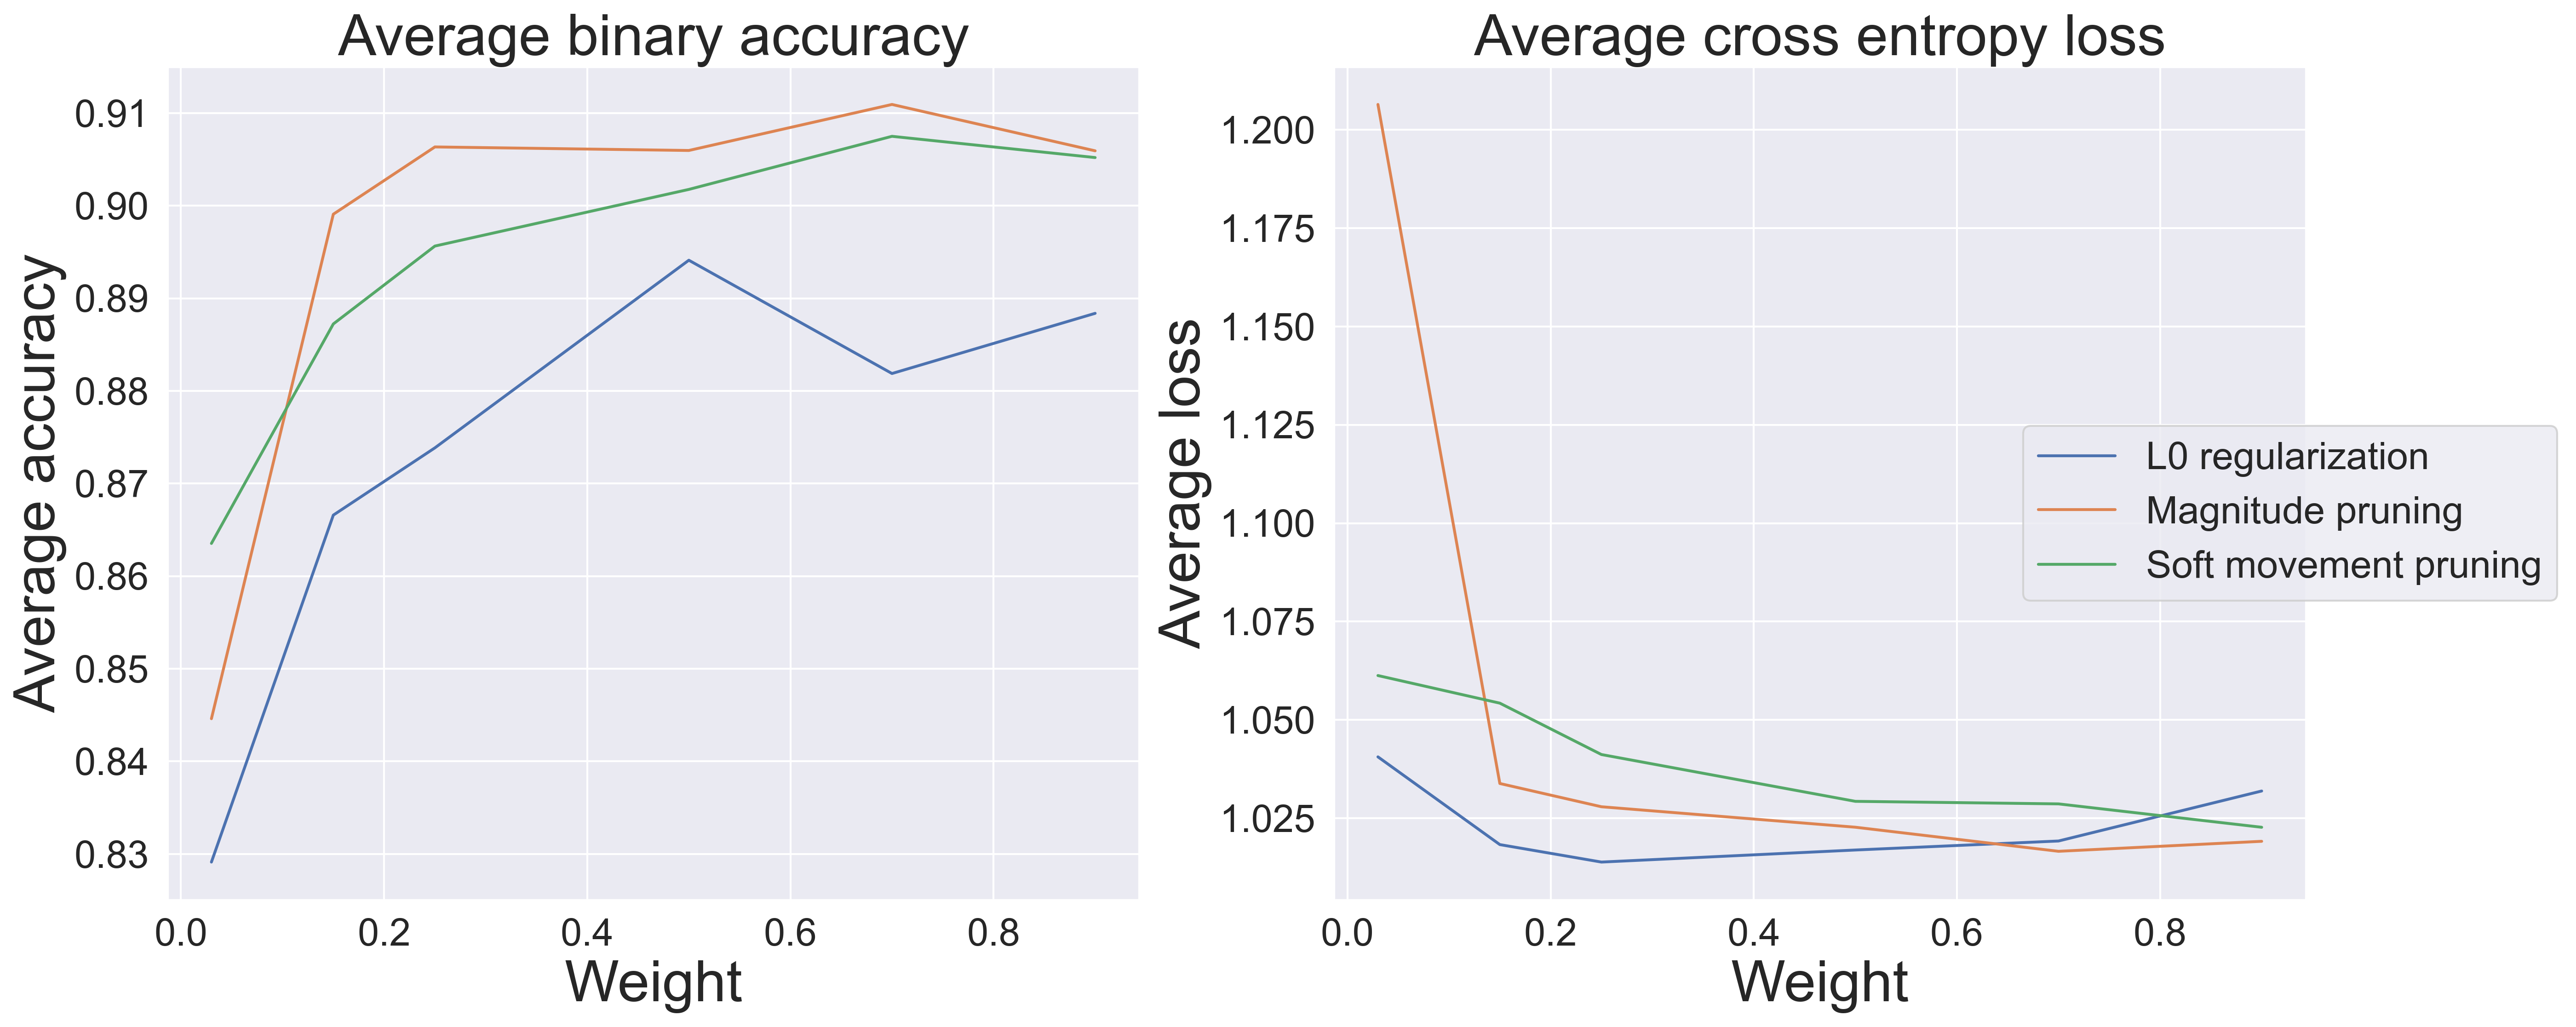

In [45]:
sns.set_theme(style="darkgrid")
methods = df.pruning_method.unique()
methods = np.delete(methods, np.where(methods == 'movement_pruning'))

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 2,
    dpi=300
)
fig.set_size_inches(20,8)

for method in methods:

    weights = mean_df.loc[
        mean_df.pruning_method == method
    ]['weight']

    acc = mean_df.loc[
        mean_df.pruning_method == method
    ]['mean_accuracy']


    loss = mean_df.loc[
        mean_df.pruning_method == method
    ]['mean_loss']


    sns.lineplot(y=acc,x=weights,ax=ax[0]);
    sns.lineplot(y=loss,x=weights,ax=ax[1]);

ax[0].set_xlabel("Weight", fontsize=30);
ax[0].set_ylabel("Average accuracy", fontsize=30);

ax[1].set_xlabel("Weight", fontsize=30);
ax[1].set_ylabel("Average loss", fontsize=30);
fig.legend(
    labels=['L0 regularization','Magnitude pruning','Soft movement pruning'],
    fontsize=20,
    loc='right'
);
ax[0].tick_params(axis='both', which='major',labelsize=20);
ax[1].tick_params(axis='both', which='major',labelsize=20);

ax[0].set_title('Average binary accuracy',fontsize=30);
ax[1].set_title('Average cross entropy loss',fontsize=30);

In [46]:
fig.savefig('average_metrics_BERT',bbox_inches='tight')